# Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read the data set

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Downloads\data.csv')

df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# Checking the shape of data set

In [3]:
df.shape

(2227, 3)

# info() function and observe the Dtypes and Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# In the given Data set we have missing values in x1, x2 columns

In [6]:
df.isnull().any(axis=0)

x1     True
x2     True
y     False
dtype: bool

In [7]:
df.isnull().all(axis=0)

x1    False
x2    False
y     False
dtype: bool

In [8]:
df.dropna(axis = 1, how='all', inplace = True)

In [10]:
df.dropna(subset=['x1'],inplace=True)

In [9]:
df.dropna(subset=['x2'],inplace=True)

In [11]:
df.shape

(2219, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [13]:
df['x1']=df['x1'].astype(int)

In [14]:
df['x2']=df['x2'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      2219 non-null   int32
 1   x2      2219 non-null   int32
 2   y       2219 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 52.0 KB


In [16]:
df.head()

,x1,x2,y
0,-119,115,1
1,-101,97,1
2,-130,106,1
3,-114,101,1
4,-119,115,1


# oulier Treatment

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='x1'>

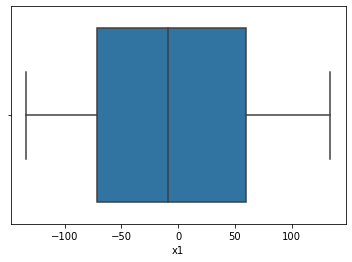

In [18]:
sns.boxplot(data=df,x='x1')

<AxesSubplot:xlabel='x2'>

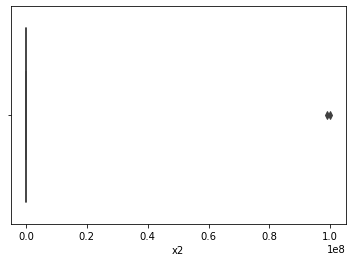

In [20]:
sns.boxplot(data=df,x='x2')

--->**From the above we observed that in balance Feature there are outlires so by using the IQR method we compute them.**

--->**Outliers will be any points below Lower_Whisker or above Upper_Whisker**

In [22]:
Q1=df['x2'].quantile(0.25)
Q3=df['x2'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

-80.0
63.0
143.0
-294.5 277.5


In [23]:
df = df[df['x2']< Upper_Whisker]

In [24]:
df.shape

(2217, 3)

In [25]:
df.head()

,x1,x2,y
0,-119,115,1
1,-101,97,1
2,-130,106,1
3,-114,101,1
4,-119,115,1


# Standardised Data

In [55]:
target = df['y']
x = df.drop("y",axis=1)

In [56]:
data.head()

,x1,x2
0,-119,115
1,-101,97
2,-130,106
3,-114,101
4,-119,115


In [57]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [58]:
print(data.shape)
print(target.shape)

(2217, 2)
(2217,)


In [59]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(2217, 2)


# Train Test Split 

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, 
                                                   target, 
                                                   test_size = 0.20, 
                                                   random_state = 0)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1773, 2)
(444, 2)
(1773,)
(444,)


# Model Building - Logistic Regression

-->In case of binary logistic regression, the target variables must be binary always and the desired outcome is represented by the factor level 1.

-->There should not be any multi-collinearity in the model, which means the independent variables must be independent of each other.

-->We must include meaningful variables in our model.

-->We should choose a large sample size for logistic regression.

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# Accuracy, Precision, Recall 

In [64]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5]}]

evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
   
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)
0.7657657657657657

for precision
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)
1.0

for recall
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)
0.4639175257731959



# Observation :
--> Using Logistic Regression we get 76% accuracy.

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7657657657657657

# Confusion Matrix

In [67]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[250,   0],
       [104,  90]], dtype=int64)

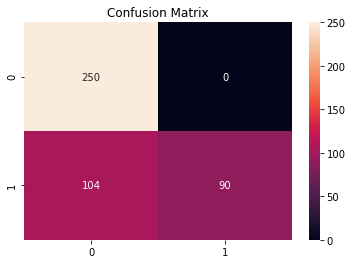

In [68]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [69]:
from sklearn import metrics

**Classification Report**

In [70]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       250
           1       1.00      0.46      0.63       194

    accuracy                           0.77       444
   macro avg       0.85      0.73      0.73       444
weighted avg       0.83      0.77      0.74       444



**F1 Score**

In [71]:
metrics.f1_score(y_test,y_pred)

0.6338028169014084

**ROC AUC**

In [72]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.5871958762886598


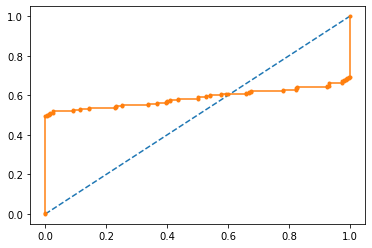

In [73]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

# Model Building - KNN 

-->K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

-->K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

-->It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

-->KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

**Accuracy, Precision, Recall**

In [75]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]
evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
   
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4, p=3)
0.9527027027027027

for precision
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=1)
0.9623655913978495

for recall
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1, p=1)
0.9484536082474226



# Obervation : 
--> Using KNN algorithm we get 95.27% accuracy.

**Predict**

In [77]:
y_pred = classifier.predict(X_test)

**Evaluate**

In [78]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.954954954954955

**Confusion Matrix**

In [79]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[241,   9],
       [ 11, 183]], dtype=int64)

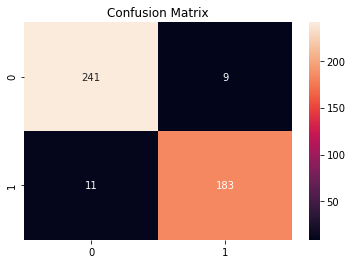

In [52]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [80]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       250
           1       0.95      0.94      0.95       194

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



**F1 Score**

In [81]:
metrics.f1_score(y_test,y_pred)

0.9481865284974094

**ROC AUC**

In [82]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.9911340206185567


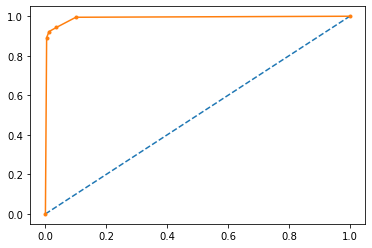

In [83]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

# Model Building - Decision Tree

-->Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

-->In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

-->The decisions or the test are performed on the basis of features of the given dataset.

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [85]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Accuracy, Precision, Recall**

In [86]:
tuned_parameters = [{'max_depth':[1,2,3,4,5]}]
evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)
0.9279279279279279

for precision
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)
1.0

for recall
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)
0.9072164948453608



# Observation:
--> Using Desion Tree model we get 92% accuracy.

**Predict**

In [87]:
y_pred = classifier.predict(X_test)

**Evaluation**

In [88]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7319819819819819

**Confusion Matrix**

In [89]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[137, 113],
       [  6, 188]], dtype=int64)

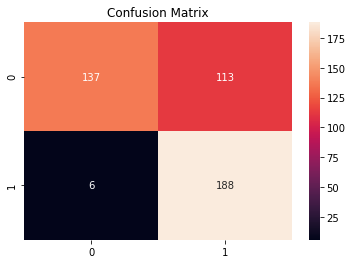

In [90]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [91]:
from sklearn import metrics

**Classification Report**

In [92]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       250
           1       0.62      0.97      0.76       194

    accuracy                           0.73       444
   macro avg       0.79      0.76      0.73       444
weighted avg       0.81      0.73      0.72       444



**F1 Score**

In [93]:
metrics.f1_score(y_test,y_pred)

0.7595959595959595

**ROC AUC**

In [94]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.8550721649484536


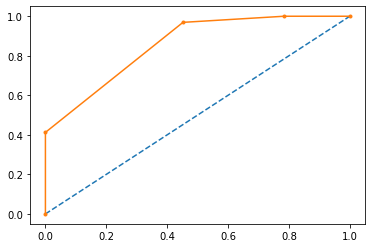

In [95]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

# Model Building - SVM

 -->In the SVM classifier, it is easy to have a linear hyper-plane between these two classes. But, another burning question which arises is, should we need to add this feature manually to have a hyper-plane. No, the SVM  algorithm has a technique called the kernel trick. The SVM kernel is a function that takes low dimensional input space and transforms it to a higher dimensional space i.e. it converts not separable problem to separable problem. It is mostly useful in non-linear separation problem. Simply put, it does some extremely complex data transformations, then finds out the process to separate the data based on the labels or outputs you’ve defined.



In [96]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [97]:
from sklearn.svm import SVC

**Accuracy, Precision, Recall**

In [110]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100,1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100,1000]}]

evaluation_metric = ['accuracy','precision','recall']

for i in evaluation_metric:
    clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.15885664690846424, 'C': 10}
SVC(C=10, gamma=0.15885664690846424)
0.954954954954955

for precision
Best parameters set found on train set:
{'kernel': 'linear', 'C': 10}
SVC(C=10, kernel='linear')
1.0

for recall
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.15885664690846424, 'C': 100}
SVC(C=100, gamma=0.15885664690846424)
0.9690721649484536



# Observation : 
--> Using SVM alogorithm we get 95.45% accuracy.

**predict**

In [101]:
y_pred = classifier.predict(X_test)

**Evaliation**

In [102]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7319819819819819

**Confusion Matix**

In [103]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[137, 113],
       [  6, 188]], dtype=int64)

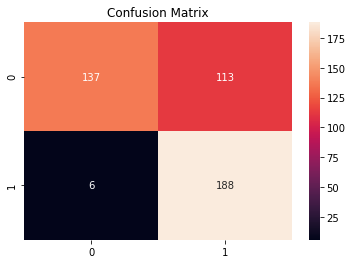

In [104]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [105]:
from sklearn import metrics

**Classification Report**

In [106]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       250
           1       0.62      0.97      0.76       194

    accuracy                           0.73       444
   macro avg       0.79      0.76      0.73       444
weighted avg       0.81      0.73      0.72       444



**F1 Score**

In [107]:
metrics.f1_score(y_test,y_pred)

0.7595959595959595

**ROC AUC**

In [108]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.8550721649484536


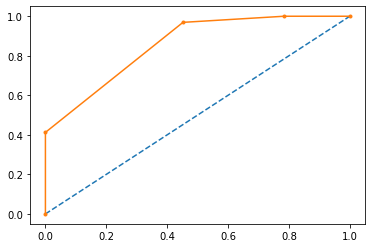

In [109]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

# Observation :
--> Compared to all the models SVM gives the best Accuracy.